# Comparing SQL vs Pandas

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/tips.csv'
 
tips=pd.read_csv(url)
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


### Limiting Rows 

In [3]:
#head() - Python
#TOP    - SQL Server

print(tips[['total_bill', 'tip', 'smoker', 'time']].head(5))
#SELECT TOP 5 total_bill, tip, smoker,time FROM tips (SQL SERVER)

   total_bill   tip smoker    time
0       16.99  1.01     No  Dinner
1       10.34  1.66     No  Dinner
2       21.01  3.50     No  Dinner
3       23.68  3.31     No  Dinner
4       24.59  3.61     No  Dinner


### Grouping Data

In [37]:
#Python - groupby().function() 
#SQL Server - SELECT A, AGGREGATE_FUNCTION() FROM table GROUP BY A    

In [38]:
print(tips.groupby('sex').size())
#SELECT sex, COUNT(*) FROM tips GROUP BY sex

sex
Female     87
Male      157
dtype: int64


In [39]:
# Lets assign it to a dataframe:
gender_count_df = pd.DataFrame(tips.groupby('sex').size(), columns=['Count'])
#this considers sex as Row Label

In [40]:
gender_count_df

,Count
sex,
Female,87
Male,157


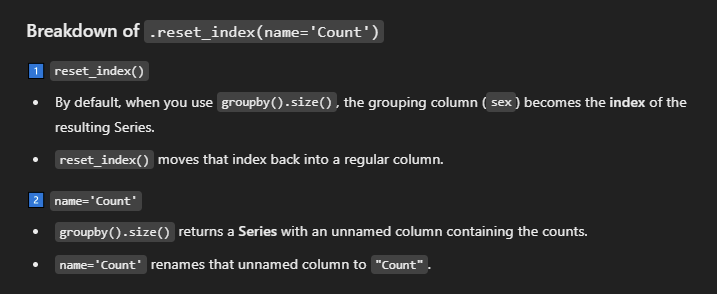

In [41]:
# Lets assign it to a dataframe:
gender_count_df = tips.groupby('sex').size().reset_index(name='Count')

In [42]:
gender_count_df

,sex,Count
0,Female,87
1,Male,157


In [30]:
type(gender_count_df)

pandas.core.frame.DataFrame

### Filtering Rows 

In [ ]:
#Python - df[select_column conditional_op 'condition_value'   ] 
#SQL Server - WHERE

In [34]:
tips['time'] #lets consider this column for WHERE condition

array(['Dinner', 'Lunch'], dtype=object)

In [35]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [36]:
tips[ tips['time'] == 'Lunch']
#SELECT * FROM tips WHERE time = 'Lunch'

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
222,8.58,1.92,Male,Yes,Fri,Lunch,1
223,15.98,3.00,Female,No,Fri,Lunch,3
224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2
